In [32]:
import pandas as pd
import networkx as nx
import time

In [33]:
### load files from the internet
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
#   print(phases[i])
  phases[i].columns = "n" + phases[i].columns
#   print(phases[i])
  phases[i].index = phases[i].columns
#   print(phases[i])
  phases[i][phases[i] > 0] = 1
#   print(phases[i])
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

In [34]:
print('(phase2) number of nodes: ',G[2].number_of_nodes(), 'n of edges: ', G[2].number_of_edges())
print('(phase6) number of nodes: ',G[6].number_of_nodes(), 'n of edges: ', G[6].number_of_edges())
print('(phase10) number of nodes: ',G[10].number_of_nodes(), 'n of edges: ', G[10].number_of_edges())

(phase2) number of nodes:  24 n of edges:  28
(phase6) number of nodes:  27 n of edges:  47
(phase10) number of nodes:  42 n of edges:  50


In [35]:
### Graphviz
### https://pygraphviz.github.io/documentation/stable/install.html

# nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  



In [39]:
### Degree centrality

start = time.time()
dict_G3_d_centrality = dict(nx.degree_centrality(G[3]))
dict_G9_d_centrality = dict(nx.degree_centrality(G[9]))
end = time.time()

print('elapsed time: ', end-start)

# print(dict_G3_d_centrality)
# print(type(dict_G3_d_centrality))

lst_entity = ['n1', 'n3', 'n12', 'n83']

print('D centrality of G3 is: ') 
lst_G3_value =[dict_G3_d_centrality[item] for item in lst_entity]
print(lst_G3_value)
# print('\n')

print('D centrality of G9 is: ') 
lst_G9_value =[dict_G9_d_centrality[item] for item in lst_entity]
print(lst_G9_value)

elapsed time:  0.0
D centrality of G3 is: 
[0.84375, 0.28125, 0.0625, 0.25]
D centrality of G9 is: 
[0.30303030303030304, 0.33333333333333337, 0.24242424242424243, 0.030303030303030304]


In [37]:

start = time.time()
dict_G3_b_centrality = dict(nx.betweenness_centrality(G[3], normalized = True))
dict_G9_b_centrality = dict(nx.betweenness_centrality(G[9], normalized = True))
end = time.time()

print('elapsed time: ', end-start)

lst_entity = ['n1', 'n3', 'n12', 'n83']

print('B centrality of G3 is: ') 
lst_G3_value =[dict_G3_b_centrality[item] for item in lst_entity]
print(lst_G3_value)
# print('\n')

print('B centrality of G9 is: ') 
lst_G9_value =[dict_G9_b_centrality[item] for item in lst_entity]
print(lst_G9_value)

elapsed time:  0.006276369094848633
B centrality of G3 is: 
[0.829502688172043, 0.09549731182795697, 0.0, 0.046572580645161295]
B centrality of G9 is: 
[0.2490530303030303, 0.5762310606060607, 0.3573232323232323, 0.0]


In [40]:
# networkx.eigenvector_centrality
start = time.time()
dict_G3_e_centrality = dict(nx.eigenvector_centrality(G[3]))
dict_G9_e_centrality = dict(nx.eigenvector_centrality(G[9]))
end = time.time()

print('elapsed time: ', end-start)

lst_entity = ['n1', 'n3', 'n12', 'n83']

print('E centrality of G3 is: ') 
lst_G3_value =[dict_G3_e_centrality[item] for item in lst_entity]
print(lst_G3_value)
# print('\n')

print('E centrality of G9 is: ') 
lst_G9_value =[dict_G9_e_centrality[item] for item in lst_entity]
print(lst_G9_value)

print(dict_G3_b_centrality)

elapsed time:  0.006183147430419922
E centrality of G3 is: 
[0.5938791958045414, 0.291304887672891, 0.1359904690175954, 0.27749730090075797]
E centrality of G9 is: 
[0.4589575176167988, 0.46798771473230655, 0.14065936326685183, 0.09178102356758049]
{'n1': 0.829502688172043, 'n4': 0.0, 'n89': 0.0, 'n83': 0.046572580645161295, 'n3': 0.09549731182795697, 'n5': 0.0625, 'n48': 0.0, 'n88': 0.0006720430107526881, 'n85': 0.029973118279569885, 'n90': 0.0, 'n86': 0.028024193548387095, 'n2': 0.0010080645161290322, 'n7': 0.0, 'n6': 0.03333333333333333, 'n8': 0.0, 'n55': 0.0, 'n10': 0.0, 'n56': 0.0, 'n76': 0.0, 'n9': 0.06754032258064516, 'n34': 0.0, 'n35': 0.0, 'n11': 0.0008064516129032258, 'n32': 0.0, 'n84': 0.0006720430107526881, 'n49': 0.007526881720430107, 'n107': 0.0, 'n50': 0.0, 'n99': 0.0, 'n13': 0.0, 'n51': 0.0, 'n12': 0.0, 'n52': 0.0}


In [55]:

dict_sum = {}
dict_avg = {}

for i in range(1, 11):
    dict_G_b_centrality = dict(nx.betweenness_centrality(G[i], normalized = True))
    
    lst_keys = list(dict_G_b_centrality.keys())
    for item in lst_keys:
        if item not in dict_sum.keys():
            dict_sum[item] = dict_G_b_centrality[item]
        else:
            dict_sum[item] += dict_G_b_centrality[item]

    for item in lst_keys:
        dict_avg[item] = dict_sum[item]/11
    
#print(dict_avg)

lst_sorted_dict_avg = sorted(dict_avg.items(), key=lambda x:x[1], reverse=True)
dict_sorted_dict_avg = dict(lst_sorted_dict_avg)
print(dict_sorted_dict_avg)
    


{'n1': 0.6072071694494051, 'n3': 0.12940285961873224, 'n12': 0.12847898473937175, 'n87': 0.05491667111311365, 'n76': 0.053604845355927064, 'n89': 0.04794845425622871, 'n83': 0.031784565037010895, 'n14': 0.02427937915742794, 'n85': 0.0232085954704376, 'n82': 0.016725528567269145, 'n37': 0.015853658536585366, 'n88': 0.012435413517588706, 'n8': 0.009169798115377987, 'n7': 0.007977502295684115, 'n9': 0.007481933389191453, 'n86': 0.007043977200350133, 'n22': 0.006984478935698448, 'n31': 0.006964809384164223, 'n5': 0.005681818181818182, 'n107': 0.005681818181818182, 'n13': 0.005681818181818182, 'n79': 0.005681818181818182, 'n2': 0.005117510669241589, 'n11': 0.005106777700095339, 'n6': 0.00402930402930403, 'n96': 0.0035439623507805326, 'n71': 0.0032150776053215075, 'n78': 0.0023530762167125806, 'n30': 0.0018078512396694215, 'n19': 0.0010185892538833714, 'n49': 0.0006842619745845552, 'n20': 0.0005543237250554324, 'n73': 0.00044345898004434584, 'n24': 0.0003325942350332594, 'n84': 6.10948191593

In [54]:

dict_sum = {}
dict_avg = {}

for i in range(1, 11):
    dict_G_e_centrality = dict(nx.eigenvector_centrality(G[i]))
    
    lst_keys = list(dict_G_e_centrality.keys())
    for item in lst_keys:
        if item not in dict_sum.keys():
            dict_sum[item] = dict_G_e_centrality[item]
        else:
            dict_sum[item] += dict_G_e_centrality[item]

    for item in lst_keys:
        dict_avg[item] = dict_sum[item]/11
    
#print(dict_avg)

lst_sorted_dict_avg = sorted(dict_avg.items(), key=lambda x:x[1], reverse=True)
dict_sorted_dict_avg = dict(lst_sorted_dict_avg)
print(dict_sorted_dict_avg)
    


{'n1': 0.5231430222489921, 'n3': 0.2877069265918333, 'n85': 0.18016467025027283, 'n83': 0.15352180271841845, 'n8': 0.15239397677796265, 'n76': 0.1520938102179164, 'n87': 0.12973400404711158, 'n2': 0.11430179838575422, 'n9': 0.10068037663051319, 'n6': 0.09733603139768353, 'n12': 0.09727133207735471, 'n82': 0.0910023680411741, 'n11': 0.0872782256500042, 'n5': 0.08553047384744338, 'n88': 0.08318046589371915, 'n89': 0.07835380827899845, 'n84': 0.07405741559487615, 'n4': 0.07086969700825439, 'n19': 0.06188276066890807, 'n90': 0.06167924444338147, 'n86': 0.058153829485874664, 'n37': 0.05118821532515594, 'n81': 0.049391885820841086, 'n15': 0.047777800029916835, 'n55': 0.04192306140306103, 'n14': 0.04067822474378599, 'n77': 0.04058592846263486, 'n34': 0.04012817121053515, 'n31': 0.035360799458782476, 'n47': 0.03391190182200819, 'n49': 0.0328886171071435, 'n64': 0.032471698715003224, 'n13': 0.03195453305043877, 'n7': 0.03152333895009411, 'n20': 0.02947353113368463, 'n52': 0.028760442998619695, 

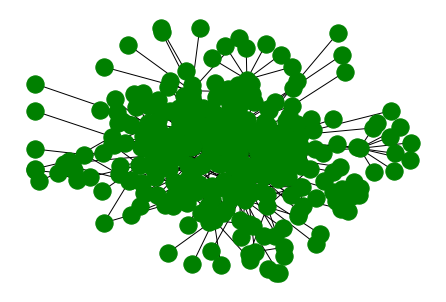

In [56]:
for i in range(1, 11):
    nx.draw(G[i], with_label = True, node_color = 'g')
    

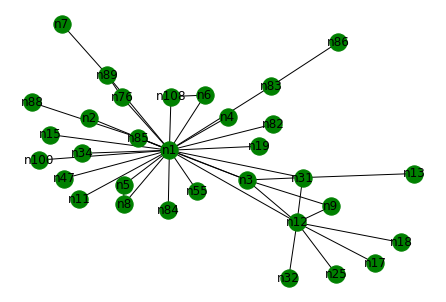

In [62]:
nx.draw(G[5], with_labels = True, node_color = 'g')
    